In [1]:
import torch
import torch.optim as optim
from matplotlib import pyplot as plt

In [2]:
t_c= [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u= [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c= torch.tensor(t_c)
t_u= torch.tensor(t_u)

In [3]:
#non linear model
def nonlinmodel(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

#linear model
def linmodel(t_u, w1, b):
    return w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs= (t_p-t_c)**2
    return squared_diffs.mean()

In [5]:
#loop for non linear model
def training_loop_nonlin(n_epochs, optimizer, params, t_u, t_c, lossVals):
    lossV = []
    epochV = []
    for epoch in range(1, n_epochs + 1):
        t_p = nonlinmodel(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 500 == 0:
            epochV.append(epoch)
            lossV.append(float(loss))
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    lossVals.append(epochV)
    lossVals.append(lossV)
    
    return params, lossVals

#loop for linear model
def training_loop_lin(n_epochs, optimizer, params, t_u, t_c, lossVals):
    lossV = []
    epochV = []
    for epoch in range(1, n_epochs + 1):
        t_p = linmodel(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if epoch % 500 == 0:
            epochV.append(epoch)
            lossV.append(float(loss))
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    lossVals.append(epochV)
    lossVals.append(lossV)
    
    return params, lossVals

In [6]:
learning_rate = 1e-2
#adjusted to match SGD t_u value
t_un= 0.01 * t_u

#Adam optimizer
#setting parameters and calling non linear loop
lossValsnonlin = []
paramsnonlin = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizernonlin = optim.Adam([paramsnonlin], lr=learning_rate)

training_loop_nonlin(n_epochs= 5000,
              optimizer = optimizernonlin,
              params = paramsnonlin,
              t_u = t_un,
              t_c= t_c,
              lossVals = lossValsnonlin)

Epoch 500, Loss 57.949387
Epoch 1000, Loss 40.551369
Epoch 1500, Loss 33.974377
Epoch 2000, Loss 27.274971
Epoch 2500, Loss 20.752821
Epoch 3000, Loss 14.940603
Epoch 3500, Loss 10.199283
Epoch 4000, Loss 6.687762
Epoch 4500, Loss 4.367294
Epoch 5000, Loss 3.038020


(tensor([19.8351, 27.2414, -7.6692], requires_grad=True),
 [[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
  [57.94938659667969,
   40.551368713378906,
   33.9743766784668,
   27.27497100830078,
   20.75282096862793,
   14.940603256225586,
   10.1992826461792,
   6.687762260437012,
   4.3672943115234375,
   3.038020133972168]])

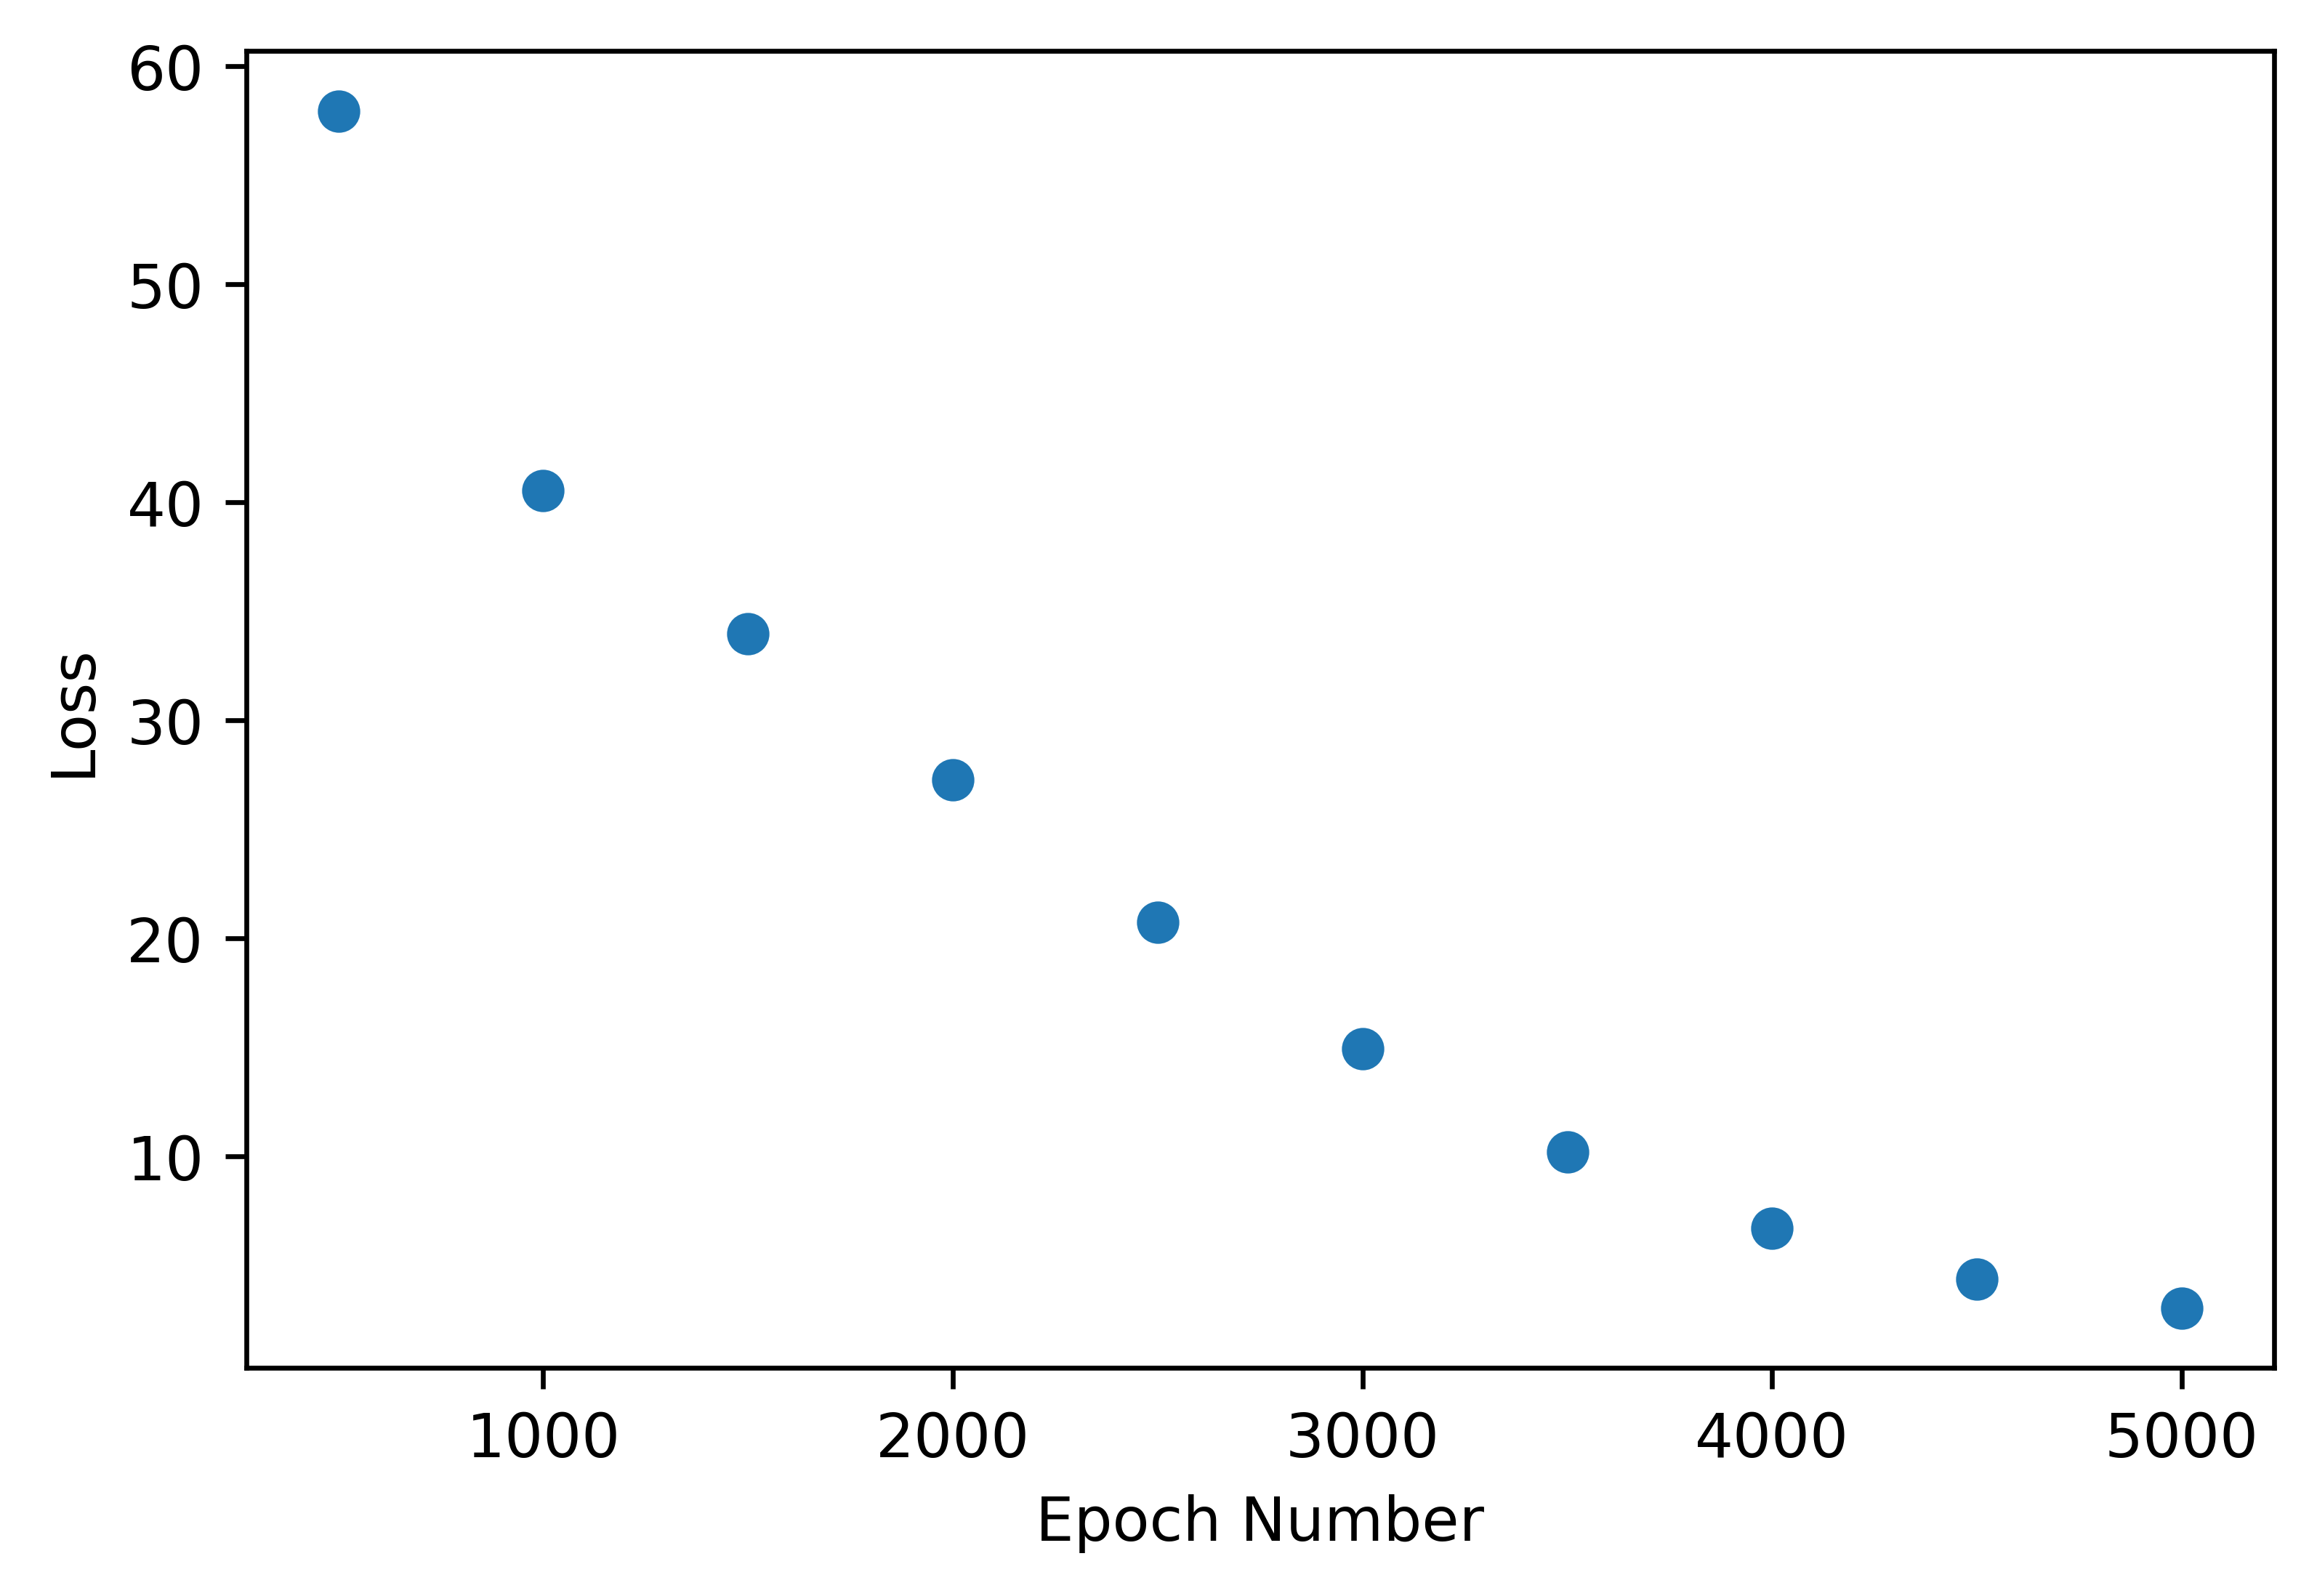

In [7]:
#plot linear model output
fig = plt.figure(dpi=600)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(lossValsnonlin[0], lossValsnonlin[1], 'o')

In [8]:
#set parameters and call linear model loop
paramslin = torch.tensor([1.0, 0.0], requires_grad=True)
optimizerlin = optim.Adam([paramslin], lr=learning_rate)
lossValslin = []

training_loop_lin(n_epochs= 5000,
              optimizer = optimizerlin,
              params = paramslin,
              t_u = t_un,
              t_c= t_c,
              lossVals = lossValslin)

Epoch 500, Loss 77.498192
Epoch 1000, Loss 56.931820
Epoch 1500, Loss 52.246971
Epoch 2000, Loss 48.030861
Epoch 2500, Loss 43.178116
Epoch 3000, Loss 37.872379
Epoch 3500, Loss 32.371433
Epoch 4000, Loss 26.948797
Epoch 4500, Loss 21.853134
Epoch 5000, Loss 17.277388


(tensor([30.1158, -4.8922], requires_grad=True),
 [[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
  [77.4981918334961,
   56.931819915771484,
   52.246971130371094,
   48.030860900878906,
   43.17811584472656,
   37.872379302978516,
   32.37143325805664,
   26.94879722595215,
   21.853134155273438,
   17.277387619018555]])

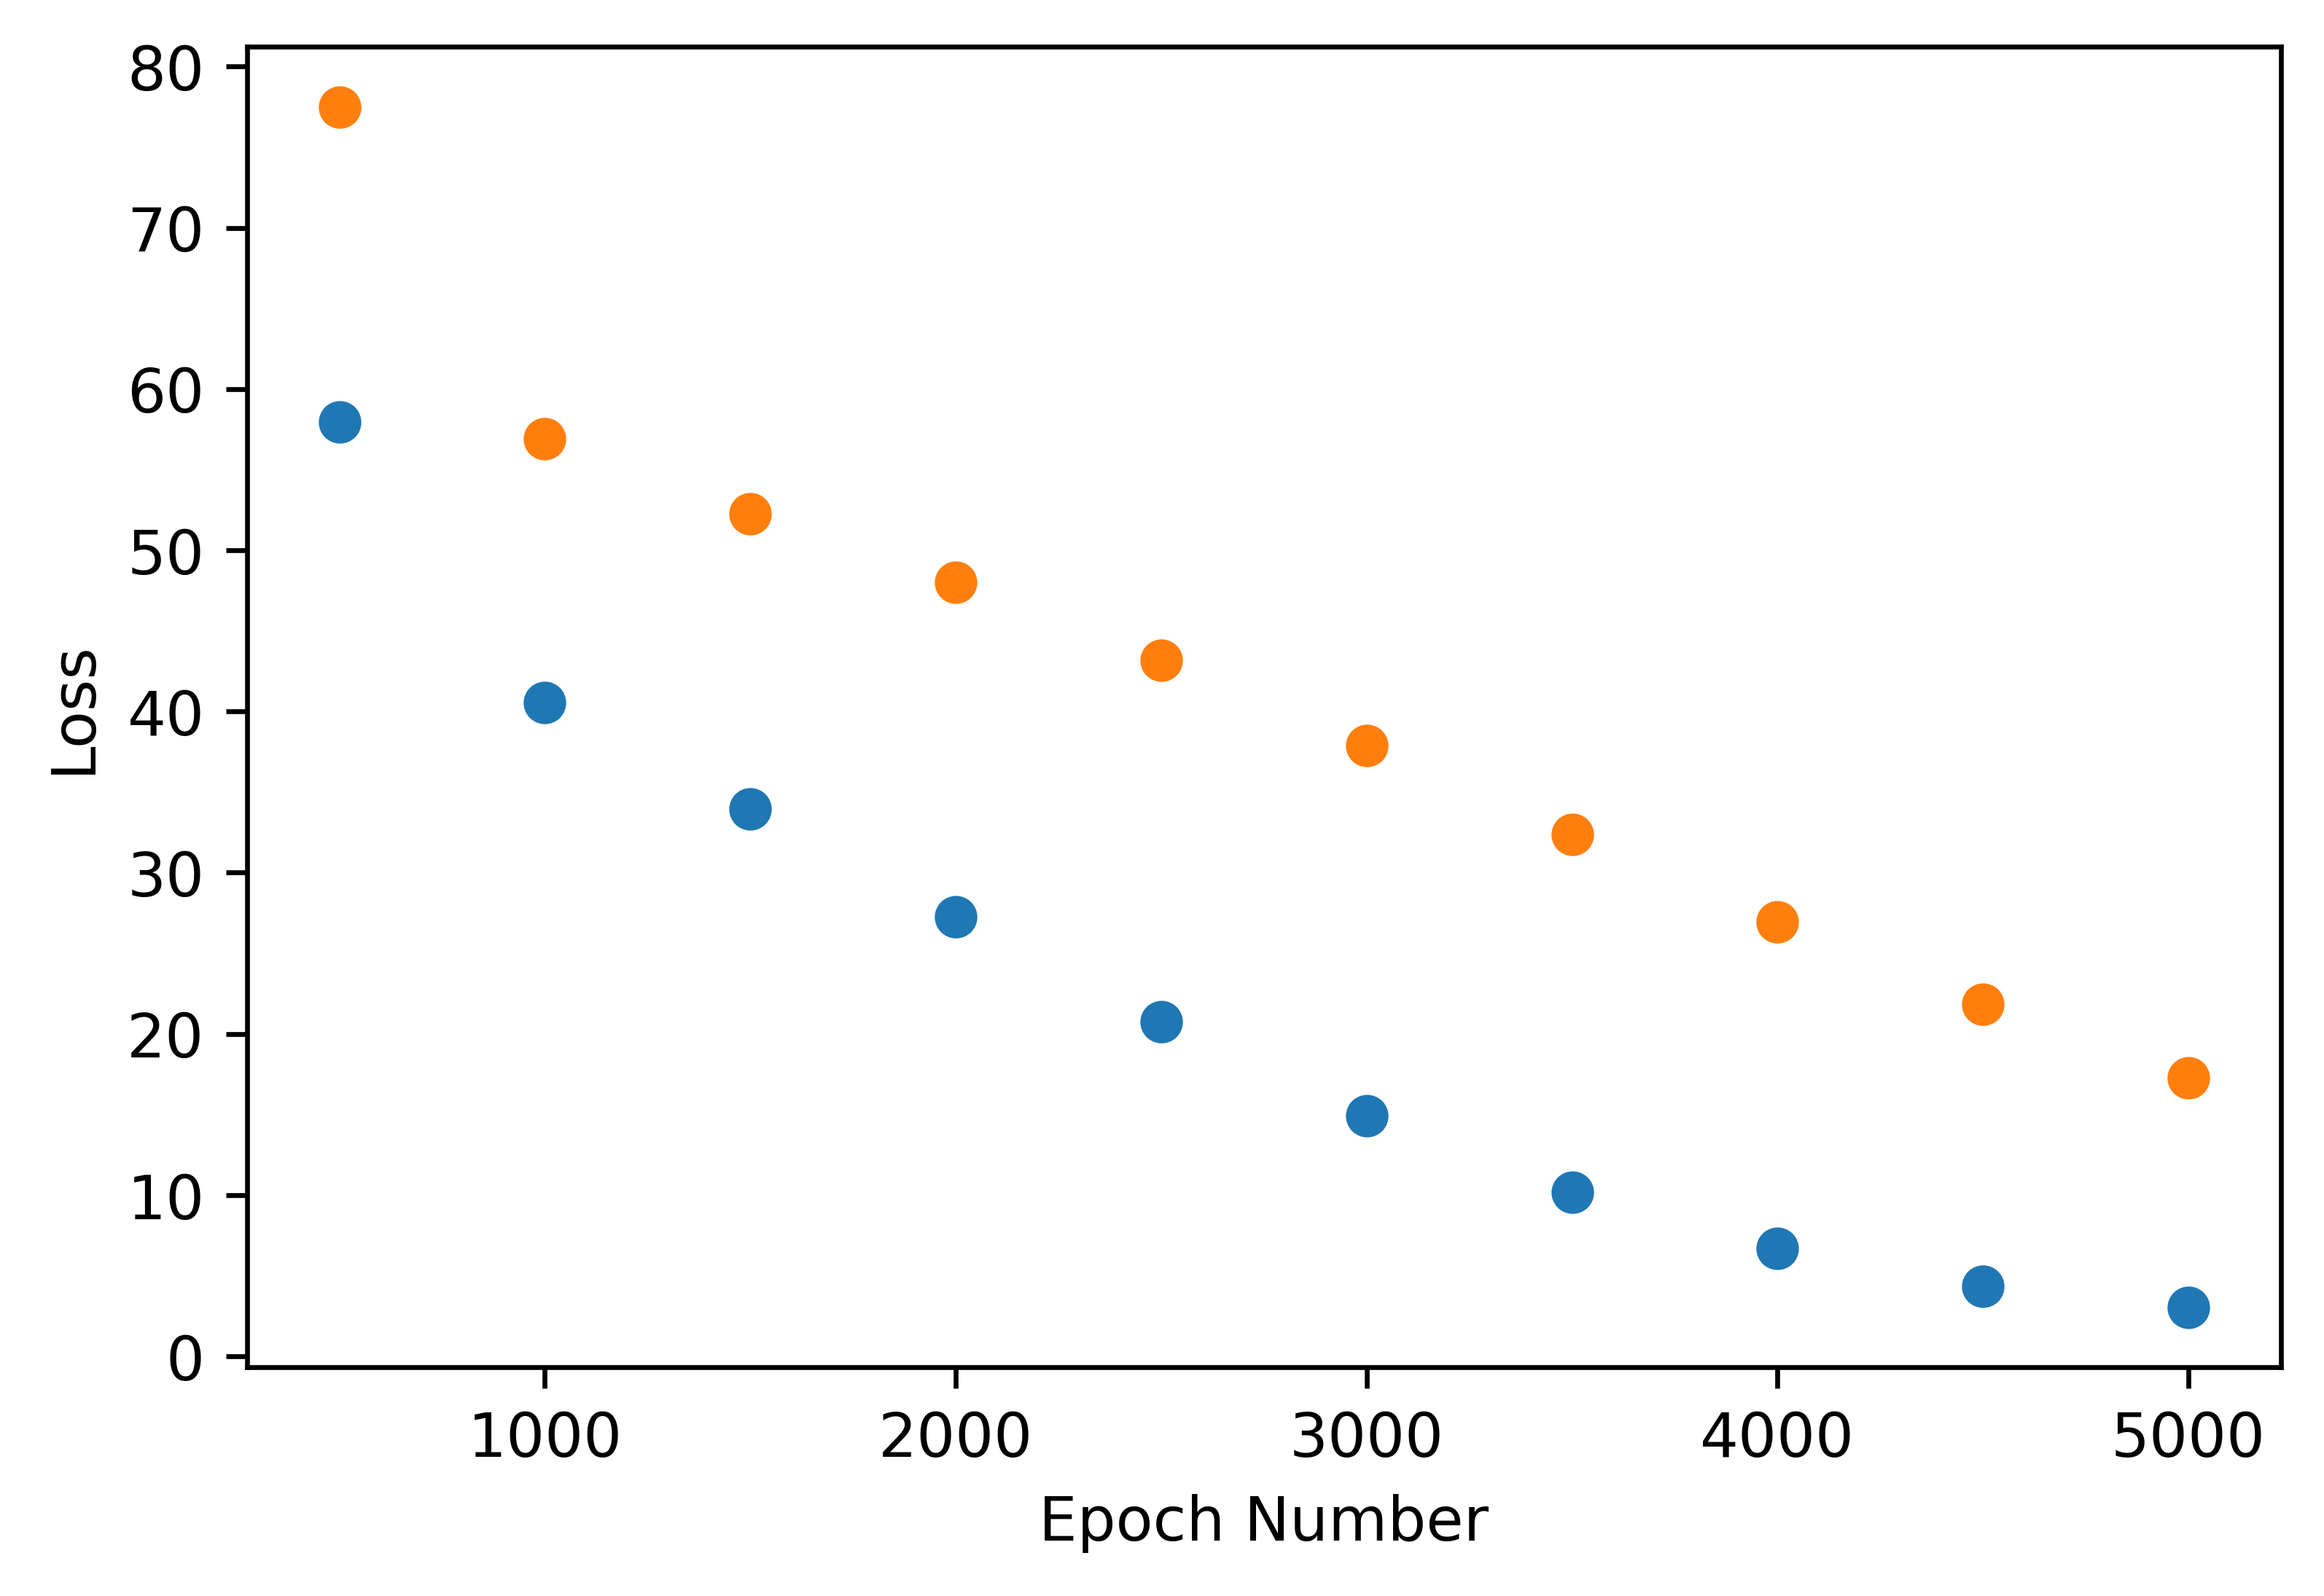

In [9]:
#plot linear model output
fig = plt.figure(dpi=600)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(lossValsnonlin[0], lossValsnonlin[1], 'o')
plt.plot(lossValslin[0], lossValslin[1], 'o')